![Illustration of silhouetted heads](mentalhealth.jpg)

Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


Explore the `students` data using PostgreSQL to find out if you would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find helpful.

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

In [1]:
-- Run this code to save the CSV file as students
SELECT * 
FROM 'students.csv';

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,NaN,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,NaN,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
-- Start coding here...
SELECT count(*) AS total_records FROM students ;

SELECT inter_dom AS Student_type, count(*) AS count_inter_dom
FROM students
GROUP BY inter_dom;

SELECT * FROM students
WHERE inter_dom = 'Inter';

SELECT * FROM students
WHERE inter_dom = 'Dom';

SELECT * FROM students
WHERE inter_dom IS NULL;

SELECT inter_dom AS Student_type, count(*) AS Num_of_students, min(todep) As min_phq, max(todep) AS max_phq, round(avg(todep)) as avg_phq, min(tosc) AS min_scs, max(tosc) AS max_scs, round(avg(tosc)) AS avg_scs, min(toas) AS min_as, max(toas) AS max_as, round(avg(toas)) AS avg_as
FROM students
GROUP BY inter_dom
HAVING inter_dom = 'Inter';

SELECT stay, round(avg(todep),2) as average_phq,  round(avg(tosc),2) AS average_scs,  round(avg(toas),2) AS average_as
FROM students
GROUP BY inter_dom, stay
HAVING inter_dom = 'Inter'
ORDER BY stay DESC;


,stay,average_phq,average_scs,average_as
0,10.0,13.00,32.00,50.00
1,8.0,10.00,44.00,65.00
2,7.0,4.00,48.00,45.00
3,6.0,6.00,38.00,58.67
4,5.0,0.00,34.00,91.00
5,4.0,8.57,33.93,87.71
6,3.0,9.09,37.13,78.00
7,2.0,8.28,37.08,77.67
8,1.0,7.48,38.11,72.80


## The international students' test scores did not vary much in regards to how much time they spent away. As shown in the visualizations below, the range and distribution of the scores in both groups follow similar patterns, with the exception of the ASISS scores. Overall, these findings do not support the conclusion that the length of a student's stay abroad is a contributing factor in the risk of mental health decline. 

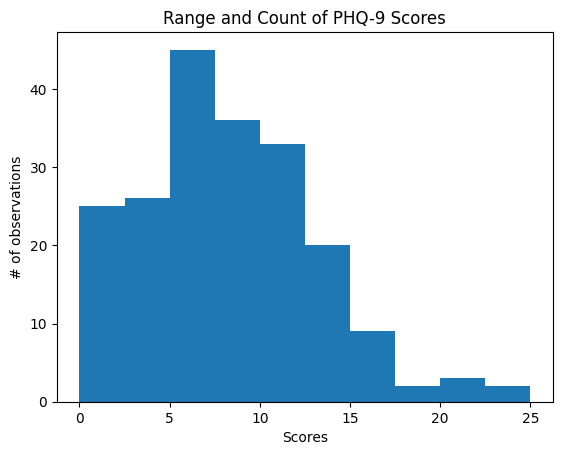

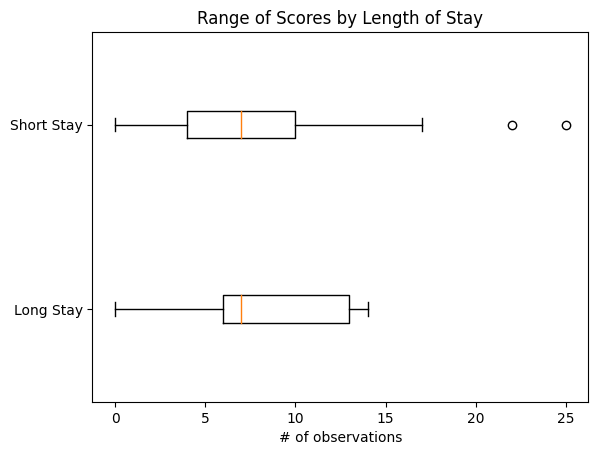

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

students = pd.read_csv('students.csv')
students_int = students[students['inter_dom']=='Inter']
long_stay_students = students_int[students_int['stay_cate']=='Long']
short_stay_students = students_int[students_int['stay_cate']=='Short']

#Visualizations for PHQ-9 scores

fig, ax = plt.subplots()
ax.hist(students_int['todep'], bins = 10)
ax.set_xlabel('Scores')
ax.set_ylabel('# of observations')
ax.set_title('Range and Count of PHQ-9 Scores')
plt.show()

fig, ax = plt.subplots()
ax.boxplot([long_stay_students['todep'],short_stay_students['todep']], vert=False)
ax.set_yticklabels(['Long Stay', 'Short Stay'])
ax.set_xlabel('# of observations')
ax.set_title('Range of Scores by Length of Stay')
plt.show()

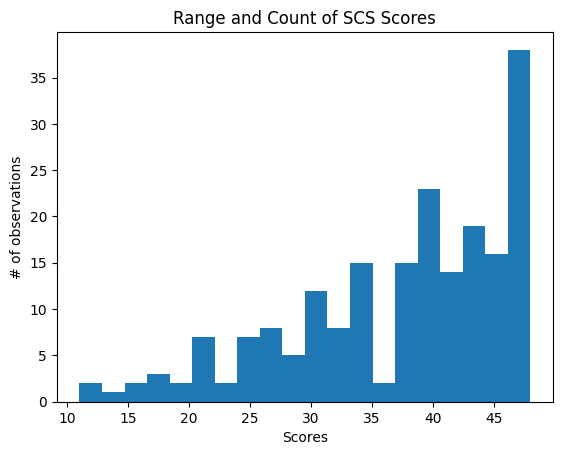

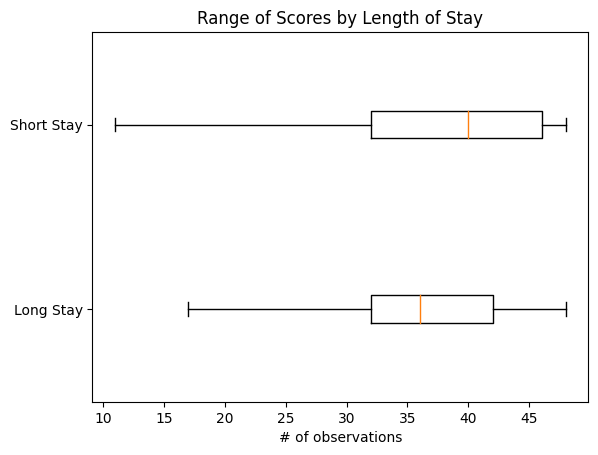

In [31]:
#Visualizations for SCS scores

fig, ax = plt.subplots()
ax.hist(students_int['tosc'], bins = 20)
ax.set_xlabel('Scores')
ax.set_ylabel('# of observations')
ax.set_title('Range and Count of SCS Scores')
plt.show()

fig, ax = plt.subplots()
ax.boxplot([long_stay_students['tosc'],short_stay_students['tosc']], vert=False)
ax.set_yticklabels(['Long Stay', 'Short Stay'])
ax.set_xlabel('# of observations')
ax.set_title('Range of Scores by Length of Stay')
plt.show()

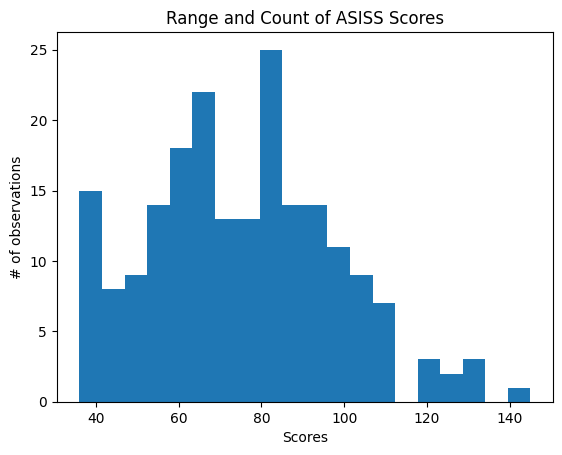

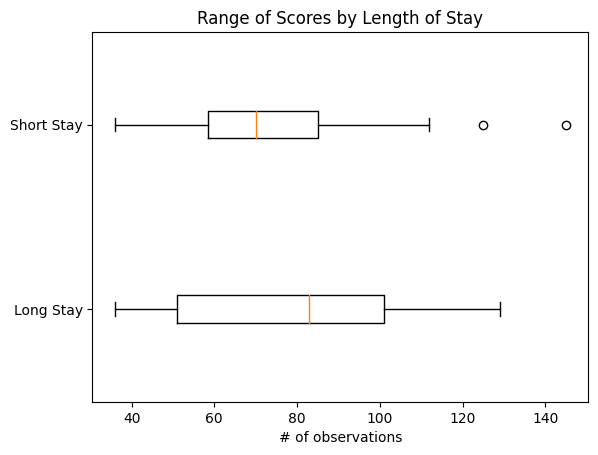

In [33]:
#Visualizations for ASISS scores

fig, ax = plt.subplots()
ax.hist(students_int['toas'], bins = 20)
ax.set_xlabel('Scores')
ax.set_ylabel('# of observations')
ax.set_title('Range and Count of ASISS Scores')
plt.show()

fig, ax = plt.subplots()
ax.boxplot([long_stay_students['toas'],short_stay_students['toas']], vert=False)
ax.set_yticklabels(['Long Stay', 'Short Stay'])
ax.set_xlabel('# of observations')
ax.set_title('Range of Scores by Length of Stay')
plt.show()